# Milestone 3, SoloProject
Table of Content:
- Introduction
- Reading CSV Files
- Data Description
- Data Cleaning
    * Logistic Company
     + Analysis
- Data Analysis
    * Warehouse Analysis
     + Result
     + Analysis
     + Datasets
     + Visual Representation
     + Conclusion
    * Trip id Analysis
     + Result
     + Analysis
     + Datasets
     + Visual Representation
     + Conclusion
- Conclusion
- Export Data

# Introduction
This project consists of analyzing the data of an automated dataset versus a human typed dataset. The datasets are logistic trips that move products from one warehouse to another. Coca-Cola makes these data with a computerized system, and the Logistic Company human typed. Furthermore, Coca-Cola separates its data by week and the Logistic company by week and product. How consistent and correct be the computerized or human dataset?

# Reading CSV files
The following part will read the csv files from Coca-Cola and the logistic company. All files starts with the year and week as follow YYYYMM. Furthermore there are 3 different format names of the logistic company and CocaCola described below:
-  Logistic Company: separates its data by week and the following products.
    * Water: files are named with the following format YYYYWWbitacora_agua.csv
    * Soda: files are named with the following format YYYYWWbitacora_gaseosa.csv
- CocaCola: separates the files by week and files are named with the following format YYYYWWnomina.csvq

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
from scripts import project_functions as pf


df_logistic_water = pf.read_csvfile('../data/raw/2020*bitacora_agua.csv')
df_logistic_water.fillna(np.nan)
print(len(df_logistic_water), '\n')

df_logistic_soda = pf.read_csvfile('../data/raw/2020*bitacora_gaseosa.csv')
df_logistic_soda.fillna(np.nan)
print(len(df_logistic_soda), '\n')

df_cocacola = pf.read_csvfile('../data/raw/2020*nomina.csv')
df_cocacola.fillna(np.nan)
print(len(df_cocacola), '\n')


21304 

19561 

41507 



# Data Description
In this section, there will be an explanation of the columns of the datasets.

In [2]:
df_logistic_water.head(0)

,remision,piloto,placa_rastra,placa,fecha,origen,destino,kilometros


In [3]:
df_logistic_soda.head(0)

,remision,piloto,placa_rastra,placa,fecha,origen,destino,kilometros


It is observed that both departments of the logistic company use the same columns to describe each trip. The description of each column is as follow:
- remision: this is the id of a trip, and it is the most important information of the trip.
- piloto: is the name of the driver.
- I placa_rastra: plate number of the raster.
- placa: plate number of the truck.
- fecha: date of the trip.
- origen: the trip's start location, it is always the name of the warehouse. It is essential to know that each warehouse has a unique number of identification.
- destino: number and name of trip's ending point (warehouse).
- kilometros: trip's kilometres.

In [4]:
df_cocacola.head(0)

,fecha,remision,origen,destino,placa,kilometros


Coca-Cola datasets are concise and not separated by product. The description of a trip goes as follow:
- fecha: date of trip
- remision: trip id
- origen: number and name of the warehouse at the starting point.
- destino: number and name of the warehouse at the ending point.
- placa: plate number of the truck.
- kilometers: kilometres of the trip.

# Data Cleaning

## Logistic Company
These files have inconsistent data, and the data analysis is necessary to perform some modifications for reading errors and for consistency purposes.

- Reading Errors: since the files have extra spanish letters (ISO-8859-1), when we are trying to read the file we can observed the character 'Ê' instead of spaces.
- Consistency Errors:
    * start_location and end_location: it is necessary to trim the strings.
    * truck_plate: delete character -.
    
    

In [5]:
print(df_logistic_water.dtypes)

remision         object
piloto           object
placa_rastra    float64
placa            object
fecha            object
origen           object
destino          object
kilometros       object
dtype: object


In [6]:
df_logistic_water

,remision,piloto,placa_rastra,placa,fecha,origen,destino,kilometros
0,29R70186356,JOSE LUIS ELIAS,4989.0,61568,2020-01-01,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,04 - SANTA ANA ÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊ,74
1,04R70259289,JOSE LUIS ELIAS,4989.0,61568,2020-01-01,04 - SANTA ANA ÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊ,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,74
2,29R70186398,JOSE LUIS ELIAS,4989.0,61568,2020-01-01,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,4
3,01R71076200,JOSE LUIS ELIAS,4989.0,61568,2020-01-02,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,5.5
4,29R70186404,JOSE LUIS ELIAS,4989.0,61568,2020-01-02,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,4
...,...,...,...,...,...,...,...,...
448,01R71103097,PEDRO EDUARDO BELTRAN BONILLA,4994.0,C-117884,2020-10-31,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,5.5
449,29R70202045,PEDRO EDUARDO BELTRAN BONILLA,4994.0,C-117884,2020-10-31,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,4
450,29R70202048,JULIO CESAR VASQUEZ RAMOS,10178.0,C-104742,2020-10-31,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,04 - SANTA ANA ÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊ,74
451,29R70202030,RENE ARMANDO DIAZ MELGAR,6938.0,C-97331,2020-10-31,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,4


### Analysis
To clean the data of the logistic company, we need to implement some steps:

    def clean_logistic(df):
        replace_column(df, 'origen', chr(202), ' ')
        replace_column(df, 'destino', chr(202), ' ')
        set_int_str(df, 'placa_rastra')
        trim_columns(df)
 
This function will start by replacing the character 'Ê' and leave a space for the columns `origen` and `destino`. Then it will change the type for the float column `placa_rastra` to string. At last, trim all the columns of the datasets, meaning erase all leading and tail spaces.

In [7]:
pf.clean_logistic(df_logistic_water)
pf.clean_logistic(df_logistic_soda)
df_logistic_water

,remision,piloto,placa_rastra,placa,fecha,origen,destino,kilometros
0,29R70186356,JOSE LUIS ELIAS,4989,NaN,2020-01-01,29 - PLANTA JUGO SAN SALV.,04 - SANTA ANA,NaN
1,04R70259289,JOSE LUIS ELIAS,4989,NaN,2020-01-01,04 - SANTA ANA,29 - PLANTA JUGO SAN SALV.,NaN
2,29R70186398,JOSE LUIS ELIAS,4989,NaN,2020-01-01,29 - PLANTA JUGO SAN SALV.,01 - PLANTA SOYAPANGO,NaN
3,01R71076200,JOSE LUIS ELIAS,4989,NaN,2020-01-02,01 - PLANTA SOYAPANGO,29 - PLANTA JUGO SAN SALV.,NaN
4,29R70186404,JOSE LUIS ELIAS,4989,NaN,2020-01-02,29 - PLANTA JUGO SAN SALV.,01 - PLANTA SOYAPANGO,NaN
...,...,...,...,...,...,...,...,...
448,01R71103097,PEDRO EDUARDO BELTRAN BONILLA,4994,C-117884,2020-10-31,01 - PLANTA SOYAPANGO,29 - PLANTA JUGO SAN SALV.,NaN
449,29R70202045,PEDRO EDUARDO BELTRAN BONILLA,4994,C-117884,2020-10-31,29 - PLANTA JUGO SAN SALV.,01 - PLANTA SOYAPANGO,NaN
450,29R70202048,JULIO CESAR VASQUEZ RAMOS,10178,C-104742,2020-10-31,29 - PLANTA JUGO SAN SALV.,04 - SANTA ANA,NaN
451,29R70202030,RENE ARMANDO DIAZ MELGAR,6938,C-97331,2020-10-31,29 - PLANTA JUGO SAN SALV.,01 - PLANTA SOYAPANGO,NaN


# Data Analysis

## Warehouses Analysis

Based on the trip records from CocaCola and the logistic company, both must have a consistent number of warehouses. If there is more variables, it means that there must be a wrong typing from one party.

### Analysis 

In [8]:
(df_cocacola[['origen', 'destino']]).nunique(axis=0)

origen     20
destino    21
dtype: int64

In [9]:
(df_logistic_water[['origen', 'destino']]).nunique(axis=0)

origen     46
destino    44
dtype: int64

In [10]:
(df_logistic_soda[['origen', 'destino']]).nunique(axis=0)

origen     152
destino    164
dtype: int64

Based on this result, we can conclude that the logistic company must have one type of inconsistency while typing the trip, that consist of 'origen' that is the start location and 'destino' which is the end. The results are:
- Coca Cola Company:
    * Unique start locations: 20
    * Unique end locations: 21
- Logistic Company, department of water:
    * Unique start locations: 46
    * Unique end locations: 44
- Logistic Company, department of soda:
    * Unique start locations: 152
    * Unique end locations: 164
 
Based on the result, does the logistic company has a lot of inconsistency while typing their records?
    

Lets try to get a pandas DataFrame with unique values of the warehouses. For that purpose, we will implement the following function:

    def getWarehouses(df, index_start='origen', index_end='destino'):
        hq = (pd.concat([pd.DataFrame([x.strip(' ') for x in sorted(set(map(str,df[index_start])))]),
                        pd.DataFrame([x.strip(' ') for x in sorted(set(map(str,df[index_end])))])])
            .drop_duplicates()
            .rename(columns={0: 'Warehouses'})
            .sort_values(by='Warehouses')
            .reset_index(drop=True))
        return hq
The fucntion getWarehouses() will use as parameters the dataframe df, index_start that will have as default the column named `origen`, and index_end that will have as default the column named `destino`. The following chain method will have a dataframe with the unique strings of the `origen` and `destino`. To get that, first, it will concatenate all the values in both columns. Second, lets drop duplicate values. Third, lets give name `Warehouses` to the new column. Fourth, lets sort all the values. At last, lets reset the index and drop the old ones. Finally, the function will return the new dataframe.

## Datasets
#### DataFrame of Warehouses automatically typed by CocaCola


In [11]:
hq_cocacola = pf.getWarehouses(df_cocacola)
hq_cocacola

,Warehouses
0,01 - PLANTA SOYAPANGO
1,04 - SANTA ANA
2,05 - SAN MIGUEL
3,06 - SONSONATE
4,07 - USULUTAN
5,08 - PASATIEMPO
6,11 - CHALATENANGO
7,12 - LA UNION
8,14 - NIXAPA
9,17 - EXPORTACIONES CERVEZA


Based on this Dataset, we can conclude that Coca-Cola is consistent with their automated activity.

#### DataFrame of Warehouses typed by Logisitc Company, Department of Water


In [12]:
hq_logistic_water = pf.getWarehouses(df_logistic_water)
hq_logistic_water

,Warehouses
0,01 - PLANTA SOYAPANGO
1,04 - SANTA ANA
2,05 - SAN MIGUEL
3,05-SAN MIGUEL
4,06 SAN MIGUEL
5,06 - SONSONATE
6,06-SONSONATE
7,07 - USULUTAN
8,07 USULUTAN
9,07- USULUTAN


By going through this dataset, the department of water is consistent but some minor mistakes like a space are normal human errors.

#### DataFrame of Warehouses typed by Logisitc Company Department of Soda


In [13]:
hq_logistic_soda = pf.getWarehouses(df_logistic_soda)
hq_logistic_soda

,Warehouses
0,01 PLANTA SOYAPANGO
1,01 - PLANTA SOYAPANGO
2,01-CD SOYAPANGO
3,01-NIXAPA
4,01-SOYAPANGO
...,...
171,TVH
172,WALMART
173,WALTMART
174,XD CHALATENANGO


Based on the number of rows, we can conclude that the department of Soda is the really incosistent and the employees are doing a really bad job.

### Visual Representation 
Now that we saw so many changes from an automated system to human typed, we will prind a barplot with the count of rows on each dataset with unique values.

[Text(0, 0.5, 'Count(rows)'),
 Text(0.5, 0, 'Company/Department'),
 Text(0.5, 1.0, 'Number of rows in Dataframes')]

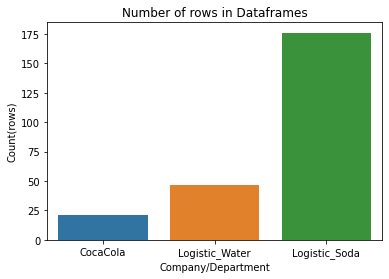

In [19]:
result = pd.DataFrame({'company' : ['CocaCola', 'Logistic_Water', 'Logistic_Soda'], 'Unique_Warehouses' : [len(hq_cocacola), len(hq_logistic_water), len(hq_logistic_soda)]})
ax = sns.barplot(data=result, x='company', y='Unique_Warehouses')
ax.set(ylabel='Count(rows)', xlabel='Company/Department', title='Number of rows in Dataframes')

### Conclusion
By using an automated processes, Coca-Cola is the company with the lowest number of different rows. We can conclude that the Logistic Company needs better consistency while typing the number and name of warehouse in the strating and ending point column.


## Trips_id Analysis
As a logistic company that have inconsistency in the data or Cocacola that is such a big enterprise might miss something, there must be different cases in their records:
- Case 1: Cocacola and the logistic recorded the trip
- Case 2: Cocacola payed a trip that the logistic company did not have one records
- Case 3: The logistic company have a record that was not payed by CocaCola

Are all the cases existent in these datasets?

### Analysis

In [20]:
df_cocacola['remision'].nunique()

41507

In [21]:
df_logistic_water['remision'].nunique() + df_logistic_soda['remision'].nunique()

39938

We can observe that there is a difference of unique values between both of the enterprises, lets try to make a visual representation of this. First we need a function to help us get the cases on top:

    def getRemisionesCases(df1, df2, df3):
        def partialDF(df, name):
            df = (pd.DataFrame([x.strip(' ') for x in sorted(set(map(str,df['remision'])))])
                     .rename(columns={0: 'remision'})
                     .set_index('remision'))
            df[name] = True
            return df
        def getCase(row):
            if (row['cocacola'] and row['logistic_water']) or (row['cocacola'] and row['logistic_soda']):
                return 'Case 1'
            elif (row['cocacola'] and ~row['logistic_water']) or (row['cocacola'] and ~row['logistic_soda']) :
                return 'Case 2'
            else:
                return 'Case 3'
    
        df1unique = partialDF(df1, 'cocacola')
        df2unique = partialDF(df2, 'logistic_water')
        df3unique = partialDF(df3, 'logistic_soda')

        dfList = [df1unique, df2unique, df3unique]
        df = pd.concat(dfList, axis=1, sort=False).fillna(False)
        df['case'] = df.apply(lambda x: getCase(x), axis=1)

        return df
 
By defining getRemisionesCases, we will get in return a dataframe with that will have as index each trip id, the existance of each in each dataset and which case the trip id belongs to. First, with each dataset we will get a two column dataframe that will have as index the trip id and a column with header the company/department name with true value in all rows. Second, we will concatenate the three dataframes by taking in consideration the trip id index, and adding the columns with false if empty. Third, we will add a new column to the data frame by taking in consideration the boolean value of existance, if there are two true it means Case 1, only true in Coca-Cola dataset means Case 2, and only true in a department of the logistic company means Case 3.

### Dataset

In [22]:
remisiones_df = pf.getRemisionesCases(df_cocacola, df_logistic_water, df_logistic_soda)
remisiones_df

,cocacola,logistic_water,logistic_soda,case
01R71043892,True,True,False,Case 1
01R71044238,True,False,True,Case 1
01R71070550,True,False,True,Case 1
01R71072969,True,False,True,Case 1
01R71073556,True,False,True,Case 1
...,...,...,...,...
95R70607127,False,False,True,Case 3
TALLER,False,False,True,Case 3
TLA,False,False,True,Case 3
TVH,False,False,True,Case 3


Now we have a dataframe with the all cases.

### Visual Representation

[Text(0, 0.5, 'Count(rows)'),
 Text(0.5, 0, 'Cases'),
 Text(0.5, 1.0, 'Number of rows in each Case')]

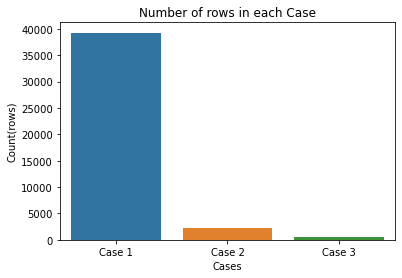

In [23]:
ax = sns.countplot(data=remisiones_df, x='case')
ax.set(ylabel='Count(rows)', xlabel='Cases', title='Number of rows in each Case')

Based on the graph, we can conclude that Coca-Cola's automated activity has more consistency in taking information of all the trips made by the logistic company. We can see that Case 2 is greater than Case 3, meaning that Coca-Cola record more trips that the Logistic company did not. 

### Conclusion
Based on our analysis, we can affirm the three hypothetical cases of the trip_id. For the different cases in which we need to go in further detail to create a solution for this problem.

# Conclusion
Based on the finding on each data analysis, we can affirm that an automated recording dataset will have greater consistency and precision than a human typed dataset.

# Export Data
We will export the different cases on the dataset for tabeau dashboard.

In [25]:
remisiones_df.to_csv('../data/processed/cases.csv')

Export the unique warehouse

In [ ]:
hq_cocacola.to_csv('../data/processed/warehouse.csv')